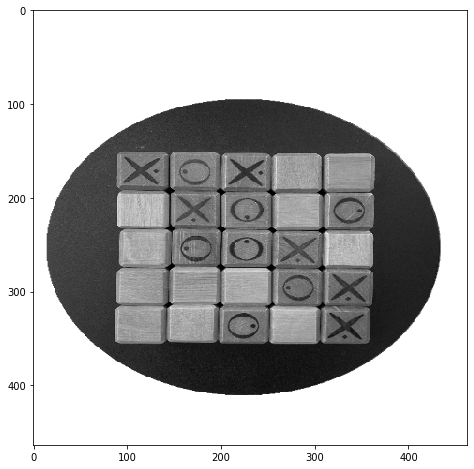

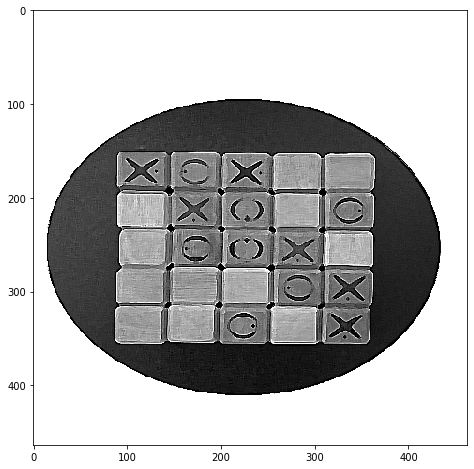

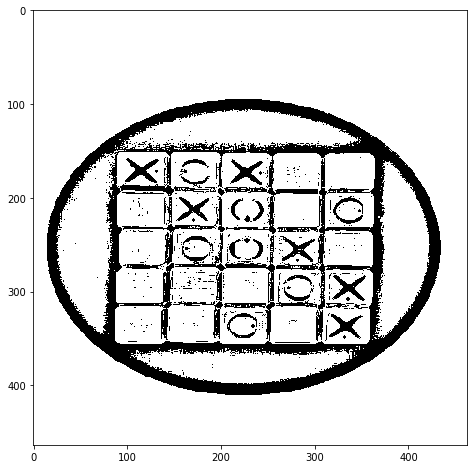

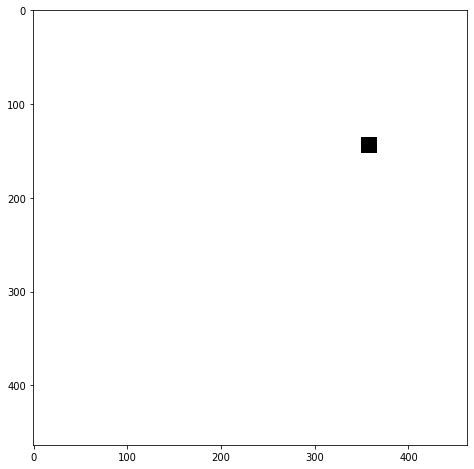

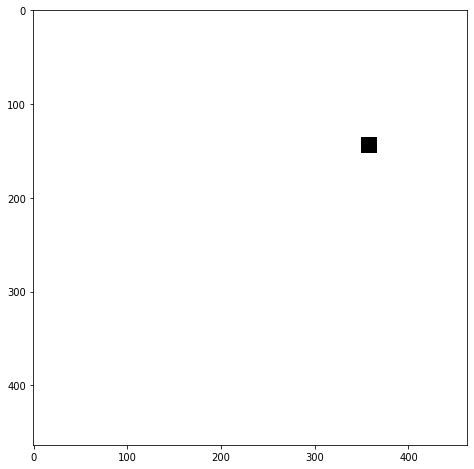

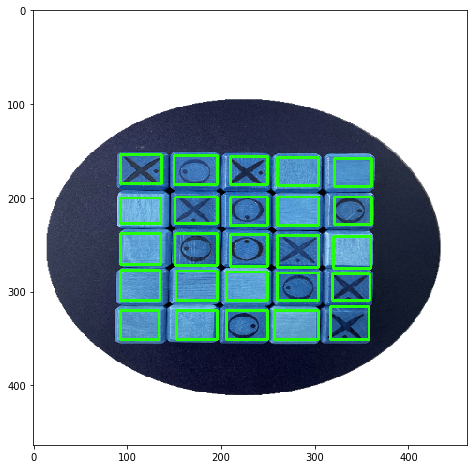

In [1]:
import cv2
import numpy as np
from collections import defaultdict
import sys
import imutils
import matplotlib.pyplot as plt


height = 463
width = 464


# Load image, grayscale, median blur, sharpen image
image = cv2.imread('faces_imgs/deneme30.png')

image = cv2.resize(image, (height,width))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)


sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(blur, -1, sharpen_kernel)



#cv2.imshow('sharpen', sharpen)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(sharpen, cmap='gray')
plt.show()

# Threshold and morph close
thresh = cv2.adaptiveThreshold(sharpen,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,31,21)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=8)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel, iterations=1)

#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
#opening = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel, iterations=1)
plt.figure(figsize=(12,8))
plt.imshow(thresh, cmap='gray')
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(close, cmap='gray')
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(opening, cmap='gray')
plt.show()







img = np.copy(opening)



# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(gray, (3, 3), 0)

img_edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)  # Canny Edge Detection

lines_list = []



# Iterate over points
def drawLines(img, lines, color=(0, 0, 0)):
    for points in lines:
        # Extracted points nested in the list
        x1, y1, x2, y2 = points[0]
        # Draw the lines joing the points
        # On the original image
        cv2.line(img, (x1, y1), (x2, y2), color, 7)
        # Maintain a simples lookup list for points
        lines_list.append([(x1, y1), (x2, y2)])


# Find horizontal and vertical lines
lines = cv2.HoughLinesP(img_edges, 1, np.pi/180, 50, minLineLength=100, maxLineGap=80)

# Draw lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    if abs(y2-y1) < 10:  # Horizontal line
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 0), 6)
    elif abs(x2-x1) < 10:  # Vertical line
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 0), 6)

cv2.imshow("foto", img)



# Draw all Hough lines in red
img_with_all_lines = np.copy(img)
drawLines(img_with_all_lines, lines)


# Find contours and filter using threshold area
cnts = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
#print(cnts)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

#cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#cnts = imutils.grab_contours(cnts)
#cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:25]

min_area = 800
max_area = 1500
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv2.boundingRect(c)
        ROI = image[y:y+h, x:x+w]
        cv2.imwrite('ROI_{}.png'.format(image_number), ROI)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        image_number += 1

plt.figure(figsize=(12,8))
plt.imshow(image, cmap='gray')
plt.show()